In [1]:
# this file collects all results for 8k, under 4 read out modes, up to cls=7 or 10.

In [2]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
#     explored_models_20200725_generator,
    explored_models_20201101_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_main_result

In [3]:
import pandas as pd

In [4]:
# get cc_max
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(('042318', '043018','051018',)))
assert cc_max_all_neurons.shape == (79,)

In [5]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201101', 'main_result_sigmoid.pkl')
makedirs(dirname(f_main_result), exist_ok=True)
if not exists(f_main_result):
    df_main_result = collect_rcnn_k_bl_main_result(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 50,
        'split_seed': 'legacy',
        'dataset_prefix': 'yuanyuan_8k_a_3day',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
        'act_fn_inner': 'sigmoid'
    },
        generator=chain(
            explored_models_20201101_generator(with_source=True, act_fn_inner_list=['sigmoid']),
            # more iterations cause OOM
    #             explored_models_20200801_generator(with_source=True),
    #             explored_models_20200725_generator(with_source=True),
        ),
        total_num_param=27,
        train_size_mapping={
            None: 5120,
        },
        cc_max_all_neurons=cc_max_all_neurons,
        num_neuron=79,
        skip_eval_json=True,
        no_missing_data=True,
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

In [6]:
df_main_result.dropna()

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           1           cm-avg       1280              0.337409   
                                                                                                  2560              0.372976   
                                                                                                  5120              0.410952   
                                                                                     cm-last      1280              0.346211   
                                                                                                  2560              0.372976   
...                                                                                                                      ...   
softplus True                 poisson   1          6         16          1           legacy       2560              0.509545   
                                                                                                  5120              0.555441   
                                                             32          1           legacy       1280              0.412306   
                                                                                                  2560              0.514995   
                                                                                                  5120              0.577779   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           1           cm-avg       1280           0.159973   
                                                                                                  2560           0.175352   
                                                                                                  5120           0.191508   
                                                                                     cm-last      1280           0.163660   
                                                                                                  2560           0.175352   
...                                                                                                                   ...   
softplus True                 poisson   1          6         16          1           legacy       2560           0.238027   
                                                                                                  5120           0.258509   
                                                             32          1           legacy       1280           0.194640   
                                                                                                  2560           0.241483   
                                                                                                  5120           0.269118   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           1           cm-avg       1280          0.354167   
                                                                                                  2560          0.374008   
                                                                                                  5120          0.403113   
                                                                                     cm-last      1280          0.358948   
                                                                           

In [7]:
# take main results and compare
f_ref_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_ref = pd.read_pickle(f_ref_result)

In [8]:
aaaa = df_main_result_ref.join(df_main_result.dropna(), how='inner', lsuffix='_ref', rsuffix='_new')

In [9]:
aaaa

cc2_normed_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu     False                mse       0          2         8           1           cm-avg       1280                  0.357125   
                                                                                                  2560                  0.524376   
                                                                                                  5120                  0.568387   
                                                                                     cm-last      1280                  0.357125   
                                                                                                  2560                  0.524376   
...                                                                                                                          ...   
softplus True                 poisson   1          6         16          1           legacy       2560                  0.624076   
                                                                                                  5120                  0.658840   
                                                             32          1           legacy       1280                  0.553747   
                                                                                                  2560                  0.636960   
                                                                                                  5120                  0.674378   

                                                                                                              cc2_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
relu     False                mse       0          2         8           1           cm-avg       1280               0.170239   
                                                                                                  2560               0.245452   
                                                                                                  5120               0.263209   
                                                                                     cm-last      1280               0.170239   
                                                                                                  2560               0.245452   
...                                                                                                                       ...   
softplus True                 poisson   1          6         16          1           legacy       2560               0.287572   
                                                                                                  5120               0.303663   
                                                             32          1           legacy       1280               0.255372   
                                                                                                  2560               0.293168   
                                                                                                  5120               0.310332   

                                                                                                              cc_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           1           cm-avg       1280              0.379368   
                                                                                                  2560              0.471792   
                                                                                                  5120              0.493379   
                                                                           

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from thesis_v2.plots.basic import scatter

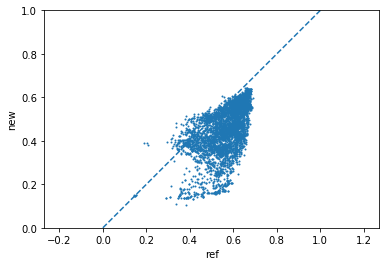

In [11]:
fig, ax = plt.subplots(squeeze=True);
scatter(ax, aaaa['cc2_normed_avg_ref'].values, aaaa['cc2_normed_avg_new'].values, 'ref', 'new')
plt.show()

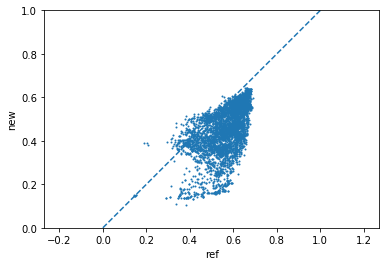

In [12]:
fig, ax = plt.subplots(squeeze=True);
scatter(ax, aaaa['cc2_normed_avg_ref'].values, aaaa['cc2_normed_avg_new'].values, 'ref', 'new')
plt.show()

In [13]:
(aaaa['cc2_normed_avg_ref'] > aaaa['cc2_normed_avg_new']).mean()

0.9074820788530465